# Presets

In [2]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
from IPython.display import display, HTML

import astropy.units as units
from __future__ import print_function
from astropy.coordinates import SkyCoord

import csv
from astroquery.gaia import Gaia

In [3]:
# Load the matched_catalogue_full.csv
catalogue = pd.read_csv('catalogue_with_distances.csv', dtype={'source_id': str, 'W1mag': str})

In [ ]:
###### delete
# catalogue['cross-match_4'] = False
# # catalogue['gaia_distance'] = np.nan
# catalogue['gaia_distance'] = False
# catalogue['gaia_distance'] = catalogue['gaia_distance'].replace('False', np.nan)

In [ ]:
objects_to_process = len(catalogue)

# Function to query Gaia for distance
def query_distance_data(source_id):
    query_distance = f"""
    SELECT 
        source_id, distance_gspphot, distance_gspphot_lower, distance_gspphot_upper
    FROM gaiadr3.astrophysical_parameters
    WHERE source_id = {source_id}
    """
    job_distance = Gaia.launch_job(query_distance)
    return job_distance.get_results()

# Function to process each object
def process_distance(i, catalogue):
    source_id = catalogue.iloc[i]['source_id']
    
    if catalogue.at[i, 'cross-match_4']:
        return None

    if source_id in ['not found', 'no Gaia id']:
        print(f"Skipping object {i + 1} because {source_id}.")
        return None

    result_distance = query_distance_data(source_id)

    if len(result_distance) > 0:
        gaia_distance = result_distance['distance_gspphot'][0] if 'distance_gspphot' in result_distance.columns else "--"
        gaia_distance_lower = result_distance['distance_gspphot_lower'][0] if 'distance_gspphot_lower' in result_distance.columns else "--"
        gaia_distance_upper = result_distance['distance_gspphot_upper'][0] if 'distance_gspphot_upper' in result_distance.columns else "--"
    else:
        gaia_distance, gaia_distance_lower, gaia_distance_upper = "--", "--", "--"

    return gaia_distance, gaia_distance_lower, gaia_distance_upper

for i in range(objects_to_process):
    result = process_distance(i, catalogue)

    if result is not None:
        gaia_distance, gaia_distance_lower, gaia_distance_upper = result
        catalogue.at[i, 'gaia_distance'] = gaia_distance
        catalogue.at[i, 'gaia_distance_lower'] = gaia_distance_lower
        catalogue.at[i, 'gaia_distance_upper'] = gaia_distance_upper
        catalogue.at[i, 'cross-match_4'] = True

    print(f"Processed object {i + 1} out of {objects_to_process}")

catalogue.to_csv('catalogue_with_distances.csv', index=False, quoting=csv.QUOTE_ALL)
print("Catalog updated with Gaia distances.")

Processed object 1 out of 7380
Processed object 2 out of 7380
Processed object 3 out of 7380
Processed object 4 out of 7380
Processed object 5 out of 7380
Processed object 6 out of 7380
Processed object 7 out of 7380
Processed object 8 out of 7380
Processed object 9 out of 7380
Processed object 10 out of 7380
Processed object 11 out of 7380
Processed object 12 out of 7380
Processed object 13 out of 7380
Processed object 14 out of 7380
Processed object 15 out of 7380
Skipping object 16 because not found.
Processed object 16 out of 7380
Processed object 17 out of 7380
Processed object 18 out of 7380
Processed object 19 out of 7380
Processed object 20 out of 7380
Processed object 21 out of 7380
Processed object 22 out of 7380
Processed object 23 out of 7380
Processed object 24 out of 7380
Skipping object 25 because not found.
Processed object 25 out of 7380
Processed object 26 out of 7380
Skipping object 27 because not found.
Processed object 27 out of 7380
Skipping object 28 because not 

In [53]:
columns_to_display = [#'name',
    'source_id',
    # 'gaia_ra', 'gaia_dec',
    # 'parallax', 'parallax_error', 'RV', 'RV error', '[M/H]', '[M/H] lower', '[M/H] upper',
    # 'logg', 'logg lower', 'logg upper', 'T_eff', 'T_eff lower', 'T_eff upper',
    # 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag',
    # 'e_Jmag', 'e_Hmag', 'e_Kmag', 'e_W1mag', 'e_W2mag',
    # "ra_error", "dec_error", "pm", "pmra", "pmra_error", "pmdec", "pmdec_error", "phot_g_mean_mag",
    # "pseudocolour",
    # "nu_eff_used_in_astrometry",
    # "ecl_lat", "astrometric_params_solved",
    # 'zero_point_correction', 'parallax_zpt_corr','distance_mode', 'distance_fwhm_high', 'distance_fwhm_low',
    # 'distance_0.015.', 'distance_2.5.', 'distance_16.',
    'distance_50.',
    # 'distance_84.', 'distance_97.5.', 'distance_99.85.',
    # 'cross-match_4',
    'gaia_distance','star_distance','gaia_distance_lower','gaia_distance_upper'
]

catalogue_reset = catalogue.reset_index()

display(HTML("""
<style>
    .scrollable-table {
        max-height: 600px;  /* Puedes ajustar la altura a tu gusto */
        overflow-y: scroll;
        display: block;
    }
# </style>
""" + catalogue_reset[["index"] + columns_to_display].to_html(classes='table scrollable-table', index=False)))

index,source_id,distance_50.,gaia_distance,star_distance,gaia_distance_lower,gaia_distance_upper
0,95652018353917056,33.206361,33.115002,32.560000,32.866299,33.519501
1,2511794495013074048,31.841121,31.7939,31.762700,31.725,31.877899
2,2511794495013074048,31.827371,31.7939,31.762700,31.725,31.877899
3,3946945413106333696,98.814748,100.691399,110.600000,91.518402,105.460098
4,1696798367260229376,126.535476,NaN,119.500000,NaN,NaN
5,1920113512486282240,76.132857,NaN,76.400000,NaN,NaN
6,1385293808145621504,17.905876,17.8885,18.100000,17.8792,17.8986
7,1385293808145621504,17.909568,17.8885,18.100000,17.8792,17.8986
8,2135550755683407232,21.136618,21.104799,21.410000,21.0846,21.116501
9,1756741374681702784,75.374761,NaN,73.100000,NaN,NaN


In [ ]:
catalogue['gaia_distance'] = pd.to_numeric(catalogue['gaia_distance'], errors='coerce')
catalogue['distance_50'] = pd.to_numeric(catalogue['distance_50.'], errors='coerce')
filtered_catalogue = catalogue.dropna(subset=['gaia_distance', 'distance_50.'])
difference = filtered_catalogue['gaia_distance'] - filtered_catalogue['distance_50.']

top_20_indices = difference.nlargest(20).index  # Get the 20 largest differences

columns_to_display = [
    'source_id',
    'distance_50.',
    'gaia_distance',
    'star_distance'
]

catalogue_reset = catalogue.reset_index()   # Reset index to include original index

top_20_table = catalogue_reset.loc[top_20_indices, ["index"] + columns_to_display]  # Select only the top 20 rows based on computed differences

# Display the table with scrolling enabled
display(HTML("""
<style>
    .scrollable-table {
        max-height: 600px;  /* Ajusta la altura según necesidad */
        overflow-y: scroll;
        display: block;
    }
</style>
""" + top_20_table.to_html(classes='table scrollable-table', index=False)))


index,source_id,distance_50.,gaia_distance,star_distance
7238,635879254021761024,449.512066,17944.4670,461.00000
6210,3601316681693936896,731.510712,16825.8100,720.00000
4680,2128256492468364160,992.294533,7331.3720,420.00000
639,4942299922130757760,5177.247743,10462.0000,32.81428
646,4904087907335334912,5481.169911,9514.8910,77.68500
3656,2131804925724122240,1946.852886,5652.1320,588.95000
7377,1410860511508492288,1822.149935,5125.3580,1813.50000
301,3328832132393159296,3405.322095,5897.0770,3300.00000
5251,2105221139747765504,2749.636093,4882.7120,2334.93000
391,4108624199978985984,249.595522,2246.7950,166.00000


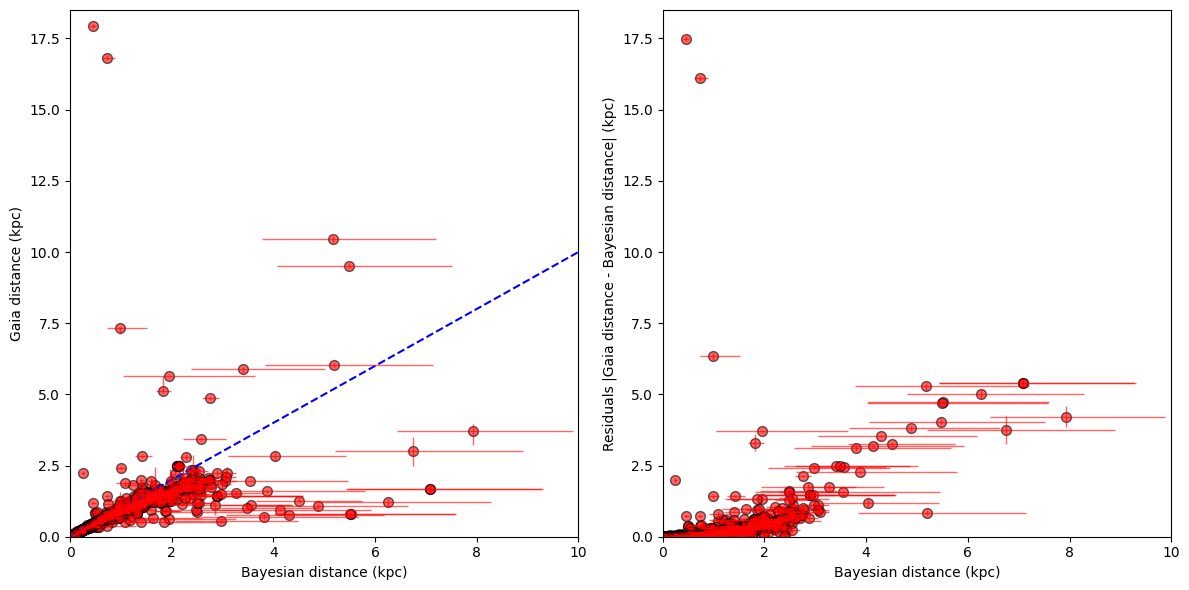

In [6]:
catalogue['gaia_distance'] = pd.to_numeric(catalogue['gaia_distance'], errors='coerce')
catalogue['distance_50'] = pd.to_numeric(catalogue['distance_50.'], errors='coerce')
catalogue['distance_16'] = pd.to_numeric(catalogue['distance_16.'], errors='coerce')
catalogue['distance_84'] = pd.to_numeric(catalogue['distance_84.'], errors='coerce')
catalogue['gaia_distance_lower'] = pd.to_numeric(catalogue['gaia_distance_lower'], errors='coerce')
catalogue['gaia_distance_upper'] = pd.to_numeric(catalogue['gaia_distance_upper'], errors='coerce')

filtered_catalogue = catalogue.dropna(subset=['gaia_distance', 'distance_50.', 'distance_16.', 'distance_84.', 'gaia_distance_lower', 'gaia_distance_upper'])
x = filtered_catalogue['distance_50.'] / 1000
y = filtered_catalogue['gaia_distance'] / 1000
xerr_lower = (filtered_catalogue['distance_50.'] - filtered_catalogue['distance_16.']) / 1000
xerr_upper = (filtered_catalogue['distance_84.'] - filtered_catalogue['distance_50.']) / 1000
yerr_lower = (filtered_catalogue['gaia_distance'] - filtered_catalogue['gaia_distance_lower']) / 1000
yerr_upper = (filtered_catalogue['gaia_distance_upper'] - filtered_catalogue['gaia_distance']) / 1000

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([0, 18.5], [0, 18.5], color='blue', linestyle='dashed', label="y = x")
plt.errorbar(x, y, xerr=[xerr_lower, xerr_upper], yerr=[yerr_lower, yerr_upper], fmt='none', color='red', ecolor='red', elinewidth=1, alpha=0.6)
plt.scatter(x, y, color='red', edgecolors='black', alpha=0.6, s=50, label="Exoplanets")
plt.xlabel('Bayesian distance (kpc)')
plt.ylabel('Gaia distance (kpc)')
plt.xlim([0, 10])
plt.ylim([0, 18.5])

x = filtered_catalogue['distance_50.'] / 1000
y = abs(filtered_catalogue['gaia_distance'] - filtered_catalogue['distance_50.']) / 1000
xerr_lower = (filtered_catalogue['distance_50.'] - filtered_catalogue['distance_16.']) / 1000
xerr_upper = (filtered_catalogue['distance_84.'] - filtered_catalogue['distance_50.']) / 1000
yerr = (filtered_catalogue['gaia_distance_upper'] - filtered_catalogue['gaia_distance_lower']) / 2000

plt.subplot(1, 2, 2)
plt.errorbar(x, y, xerr=[xerr_lower, xerr_upper], yerr=yerr, fmt='none', color='red', ecolor='red', elinewidth=1, alpha=0.6)
plt.scatter(x, y, color='red', edgecolors='black', alpha=0.6, s=50, label="Exoplanets")
plt.xlabel('Bayesian distance (kpc)')
plt.ylabel('Residuals |Gaia distance - Bayesian distance| (kpc)')
plt.xlim([0, 10])
plt.ylim([0, 18.5])
plt.tight_layout()
plt.show()
